In [ ]:
from sklearn.datasets import make_blobs

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
X, y = make_blobs(n_samples = 300, n_features = 2, centers = 3, cluster_std = 0.65, shuffle = True, random_state = 0)

# k-средних

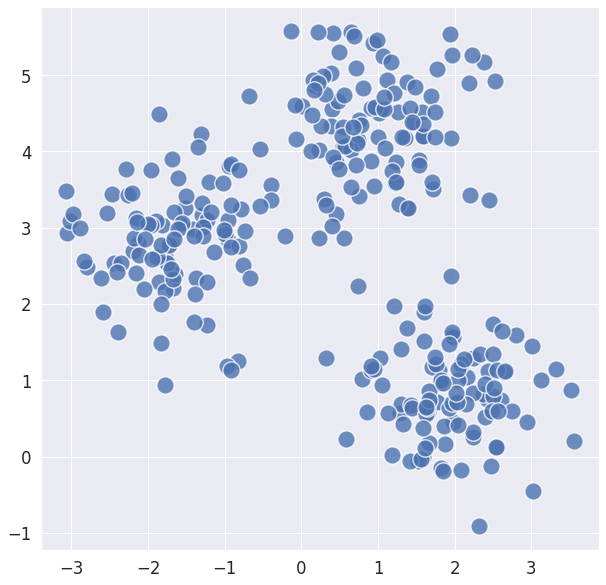

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], s = 300, alpha = 0.8)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 1, tol = 0.0001)
y_km = km.fit_predict(X)

In [ ]:
len(y_km)

300

In [ ]:
y_km = ['кластер ' + str(i) for i in y_km]

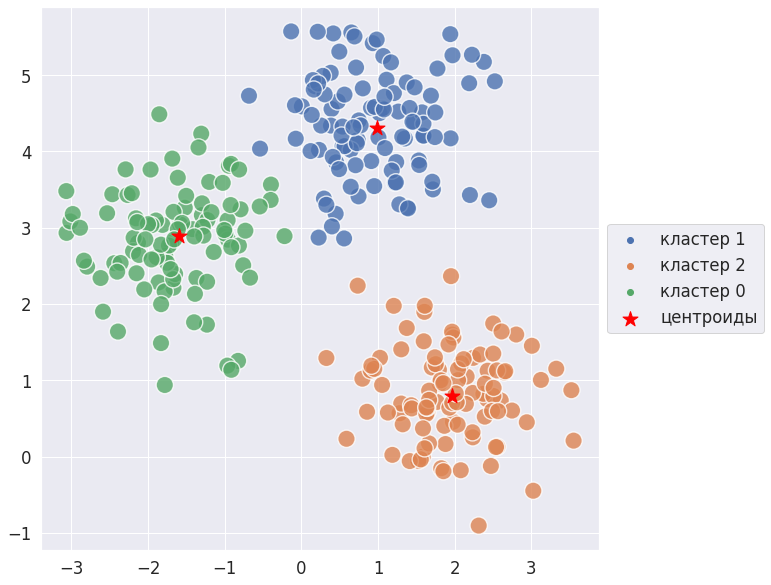

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'центроиды') 
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
print('Сумма квадратов расстояний от объектов до ближайшего центра кластера: %.2f' % km.inertia_)

Сумма квадратов расстояний от объектов до ближайшего центра кластера: 249.52


In [ ]:
sse = []
k_list = range(1, 11)
for k in k_list:
    km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
    km.fit(X)
    sse.append(km.inertia_)

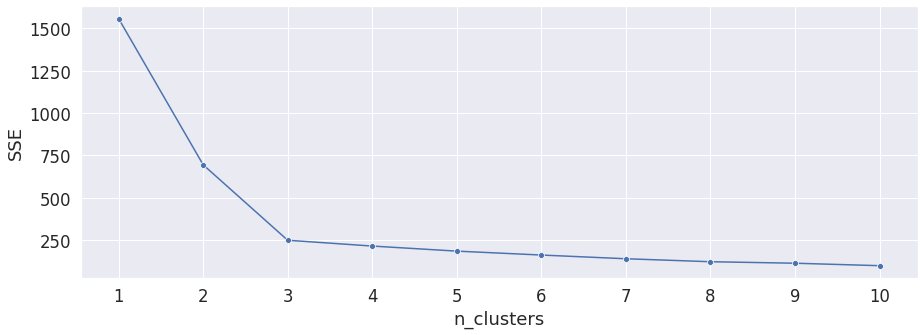

In [ ]:
sse_km = pd.DataFrame({'SSE': sse, 'n_clusters': list(k_list)})

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 5))
ax.set_xticks(range(1, 11, 1))
sns.lineplot(data = sse_km, x = "n_clusters", y = "SSE", marker = 'o');

In [ ]:
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
y_km = km.fit_predict(X)

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean') 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f88a6f83828>,
                     model=None)

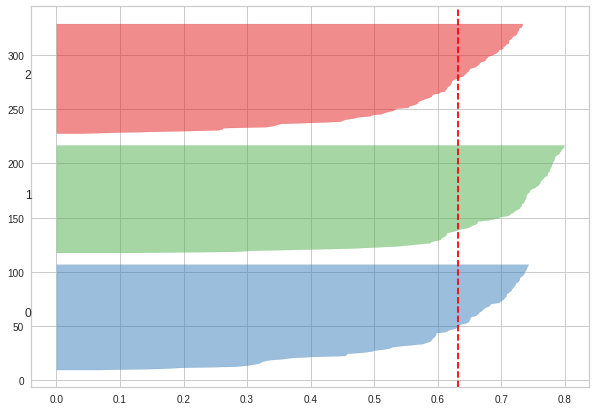

In [ ]:
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
f, ax = plt.subplots(figsize=(10, 7))
visualizer.fit(X)

In [ ]:
km = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
y_km = km.fit_predict(X)

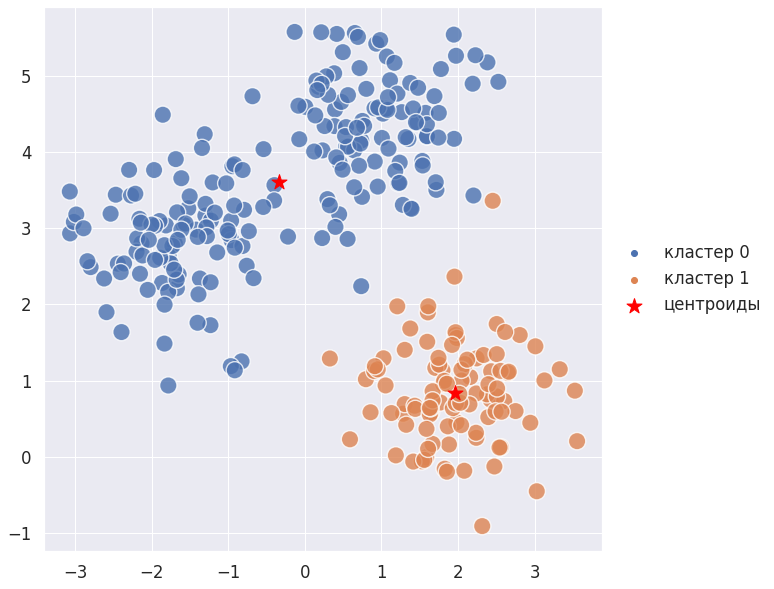

In [ ]:
y_km = ['кластер ' + str(i) for i in y_km]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'центроиды') 
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
print('Сумма квадратов расстояний от объектов до ближайшего центра кластера: %.2f' % km.inertia_)

Сумма квадратов расстояний от объектов до ближайшего центра кластера: 693.84


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f88a4680208>,
                     model=None)

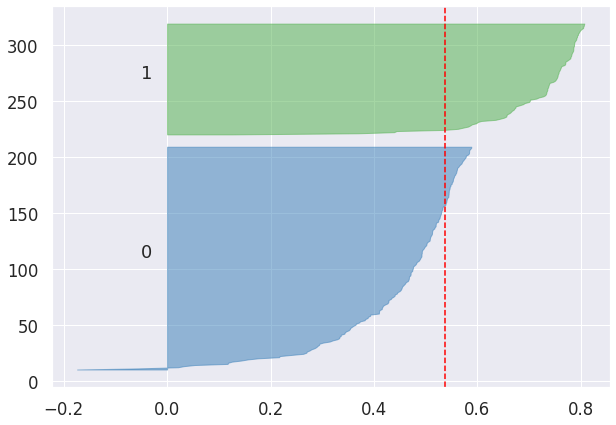

In [ ]:
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
f, ax = plt.subplots(figsize=(10, 7))
visualizer.fit(X)

# Иерархическая кластеризация

In [ ]:
np.random.seed(123)
variables = ['Х', 'Y', 'Z']
labels = ['ID_O', 'ID_l', 'ID_2', 'ID_З', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns = variables , index = labels)
df

,Х,Y,Z
ID_O,6.964692,2.861393,2.268515
ID_l,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_З,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

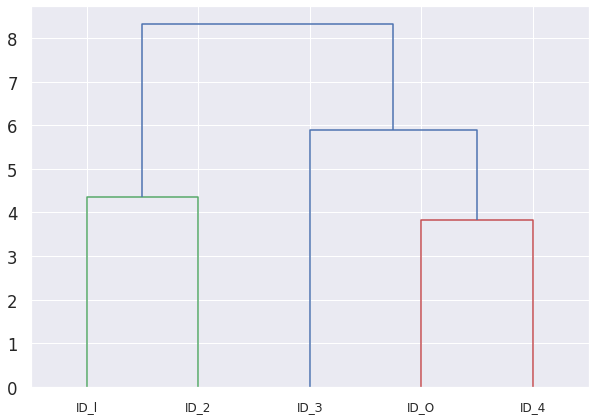

In [ ]:
row_clusters = linkage(df.values, method = 'complete', metric = 'euclidean')
f, ax = plt.subplots(figsize=(10, 7))
row_dendr = dendrogram(row_clusters, labels = labels)

In [ ]:
ac = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(df)
ac_res

array([0, 1, 1, 0, 0])

In [ ]:
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

In [ ]:
df_X = pd.DataFrame(X, columns = ['X', 'Y'])

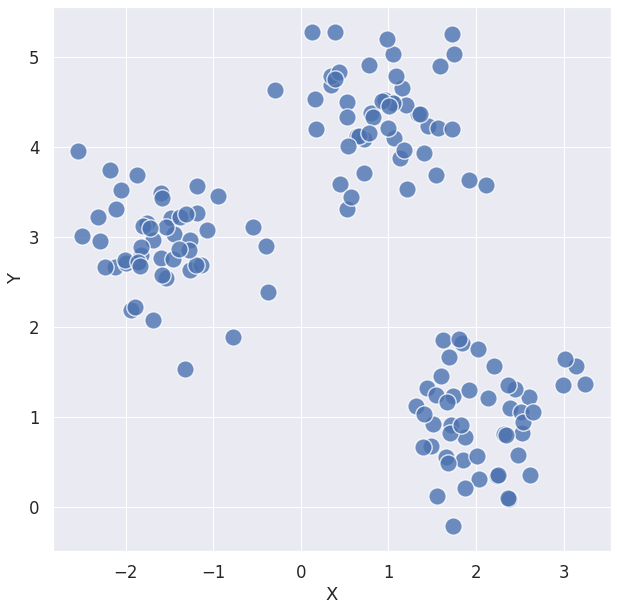

In [ ]:
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(data = df_X, x = 'X', y = 'Y', s = 300, alpha = 0.8)

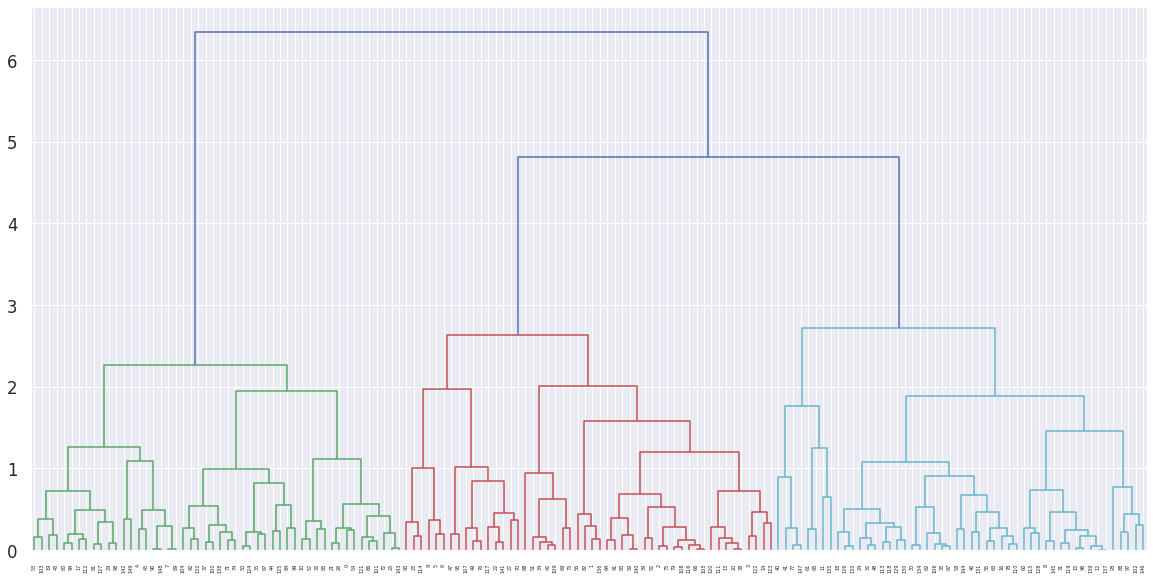

In [ ]:
row_clusters = linkage(df_X.values, method = 'complete', metric = 'euclidean')
f, ax = plt.subplots(figsize=(20, 10))
row_dendr = dendrogram(row_clusters)

In [ ]:
ac = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(df_X)
ac_res

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1])

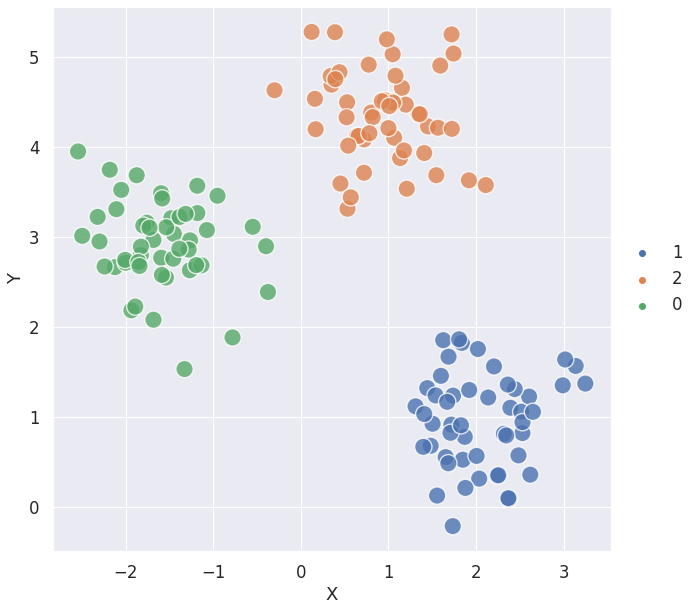

In [ ]:
ac_res = [str(i) for i in ac_res]
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(10, 10))
g = sns.scatterplot(data = df_X, x = 'X', y = 'Y', hue = ac_res, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

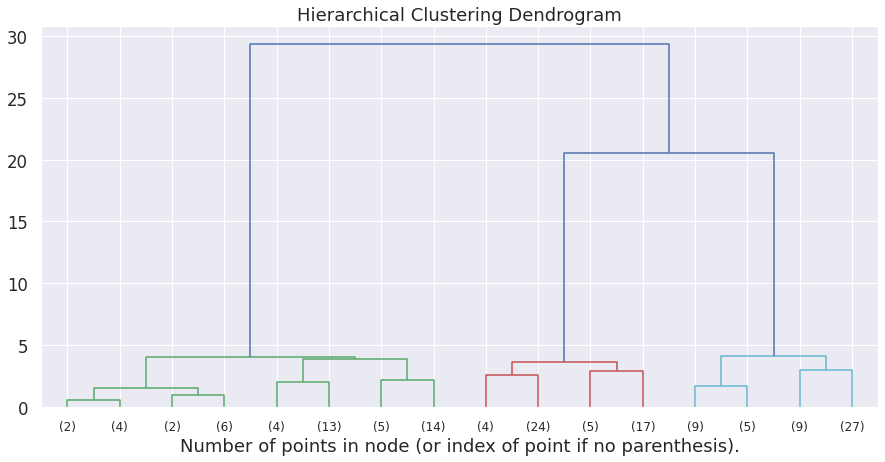

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(n_clusters = None, distance_threshold = 0).fit(df_X)

f, ax = plt.subplots(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#А если у нас сложный случай?

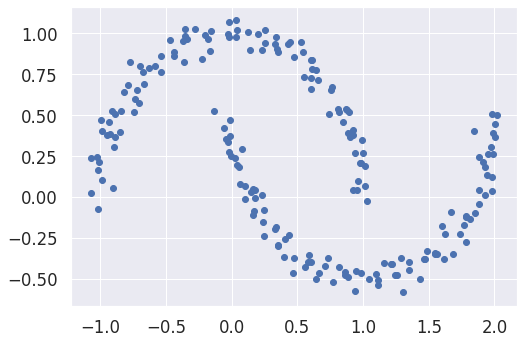

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons (n_samples = 200, noise=0.05, random_state = 0)
plt.scatter(X[:, 0] , X[:, 1])
plt.show()

In [ ]:
km = KMeans(n_clusters = 2, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
y_km = km.fit_predict(X)

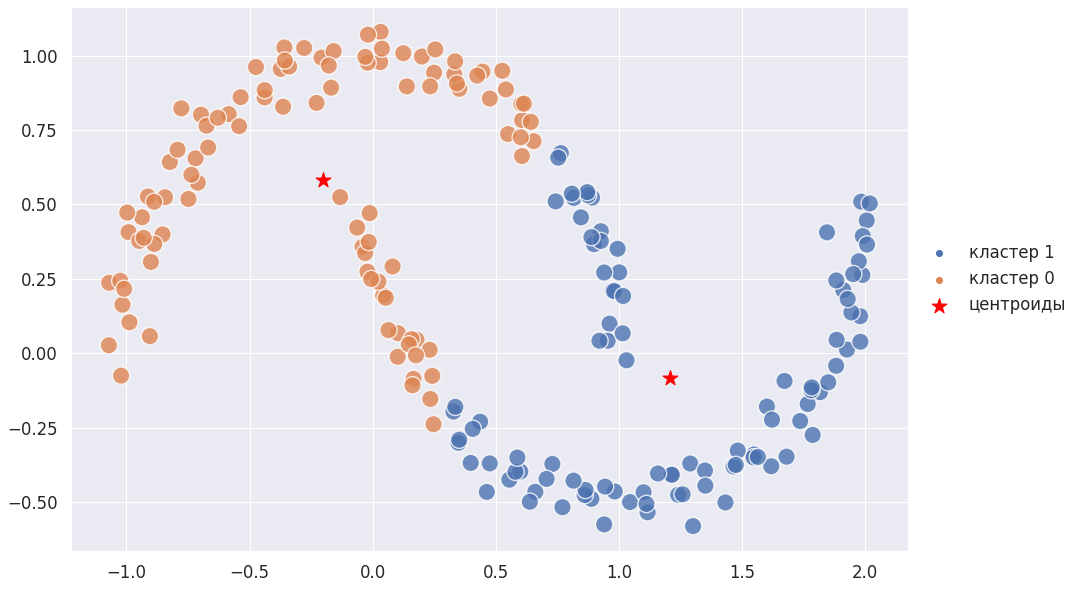

In [ ]:
y_km = ['кластер ' + str(i) for i in y_km]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'центроиды') 
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
print('Сумма квадратов расстояний от объектов до ближайшего центра кластера: %.2f' % km.inertia_)

Сумма квадратов расстояний от объектов до ближайшего центра кластера: 79.66


In [ ]:
sse = []
k_list = range(1, 11)
for k in k_list:
    km = KMeans(n_clusters = k, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
    km.fit(X)
    sse.append(km.inertia_)

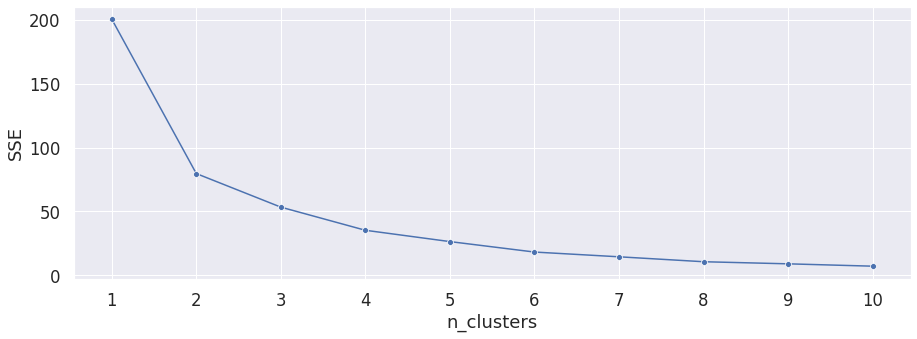

In [ ]:
sse_km = pd.DataFrame({'SSE': sse, 'n_clusters': list(k_list)})

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 5))
ax.set_xticks(range(1, 11, 1))
sns.lineplot(data = sse_km, x = "n_clusters", y = "SSE", marker = 'o');

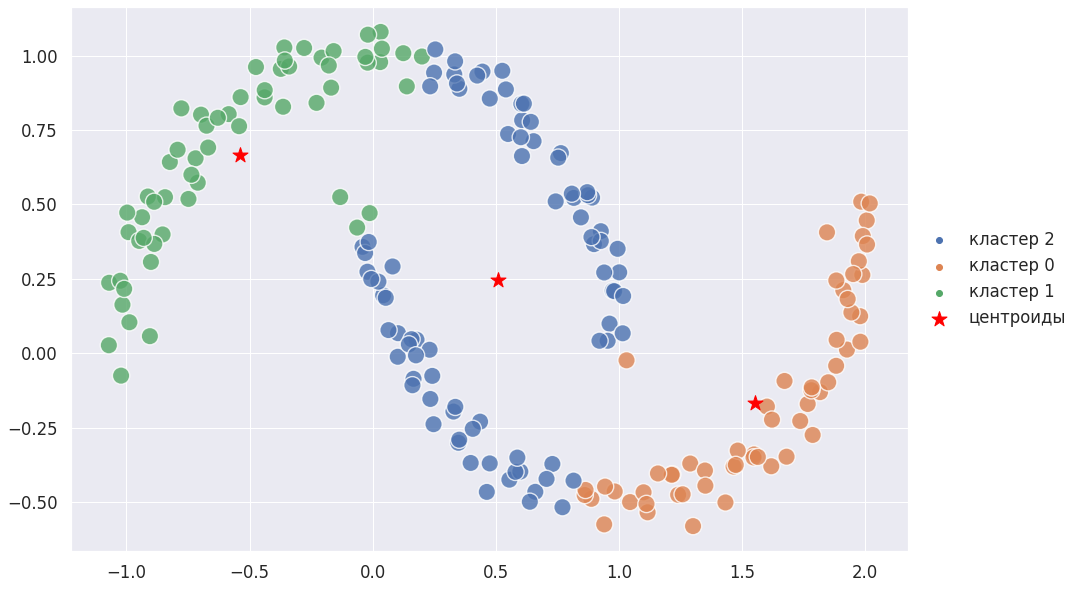

In [ ]:
km = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 100, tol = 0.0001, random_state = 0)
y_km = km.fit_predict(X)

y_km = ['кластер ' + str(i) for i in y_km]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_km, s = 300, alpha = 0.8)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, marker = '*', c = 'red', label = 'центроиды') 
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

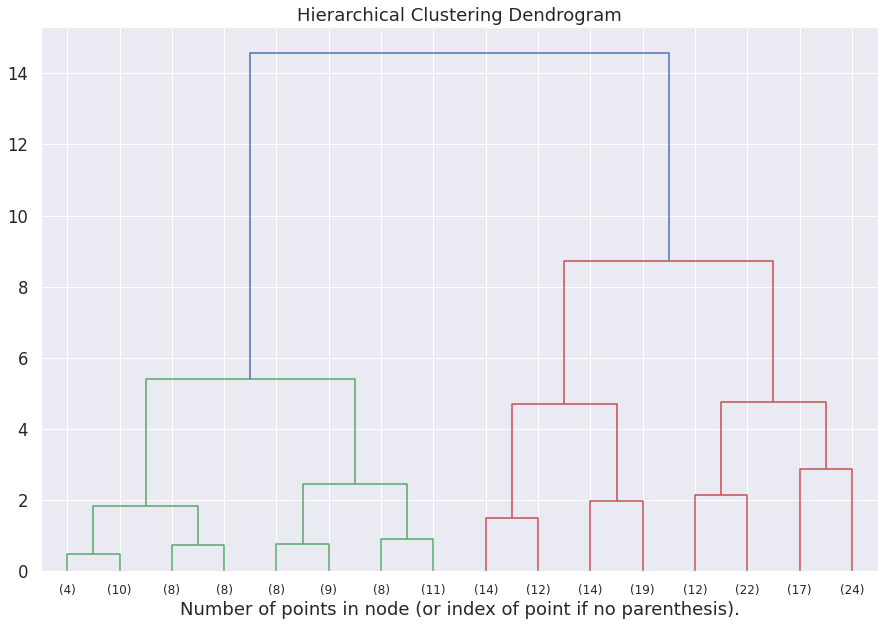

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(n_clusters = None, distance_threshold = 0).fit(X)

f, ax = plt.subplots(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p = 3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

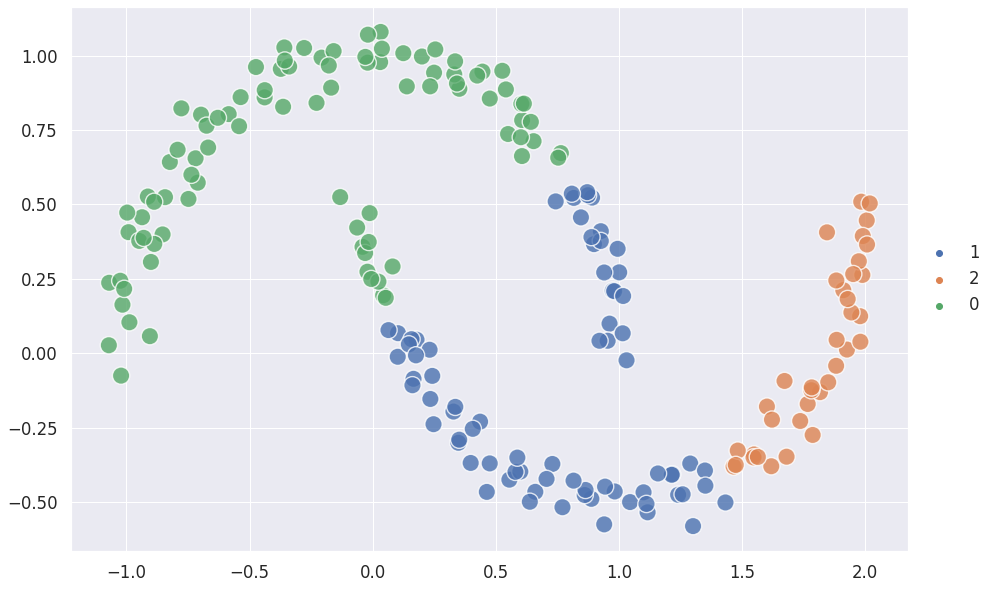

In [ ]:
ac = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(X)

ac_res = [str(i) for i in ac_res]
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = ac_res, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

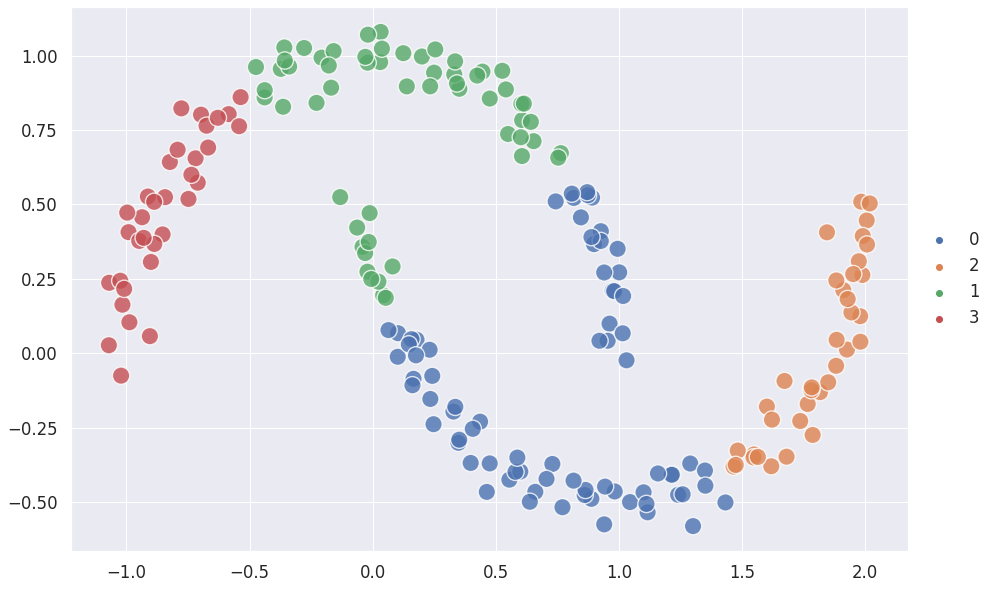

In [ ]:
ac = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage = 'complete')
ac_res = ac.fit_predict(X)

ac_res = [str(i) for i in ac_res]
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = ac_res, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

# DBSCAN

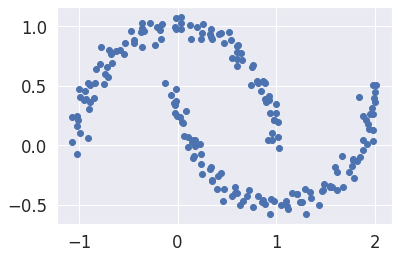

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons (n_samples = 200, noise=0.05, random_state = 0)
plt.scatter(X[:, 0] , X[:, 1])
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps = 0.3, min_samples = 5)
y_db = db.fit_predict(X)

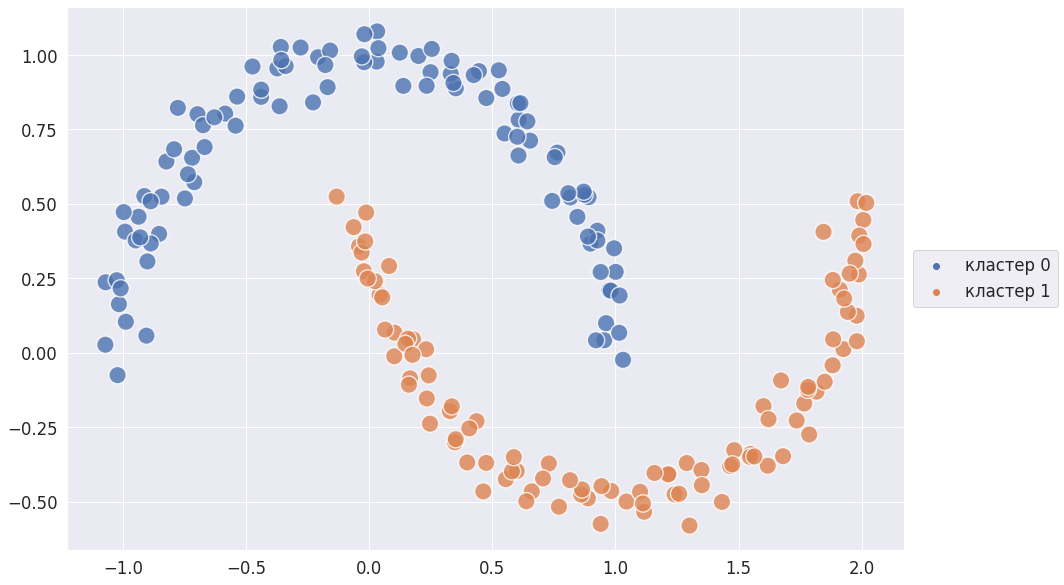

In [ ]:
y_db = ['кластер ' + str(i) for i in y_db]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_db, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)

In [ ]:
from sklearn.neighbors import NearestNeighbors

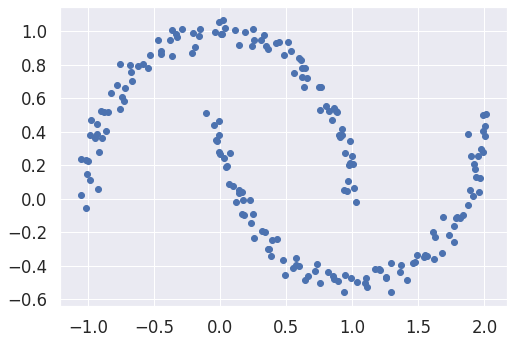

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons (n_samples = 200, noise = 0.04, random_state = 0)
plt.scatter(X[:, 0] , X[:, 1])
plt.show()

In [ ]:
neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

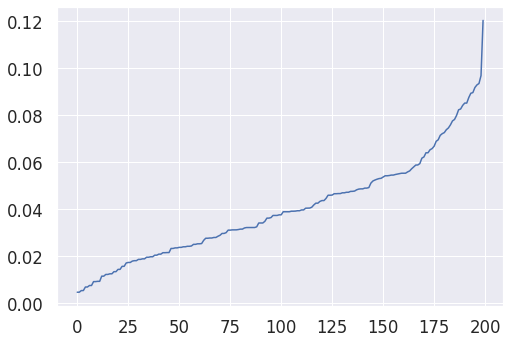

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
db = DBSCAN(eps = 0.15, min_samples = 5)
y_db = db.fit_predict(X)

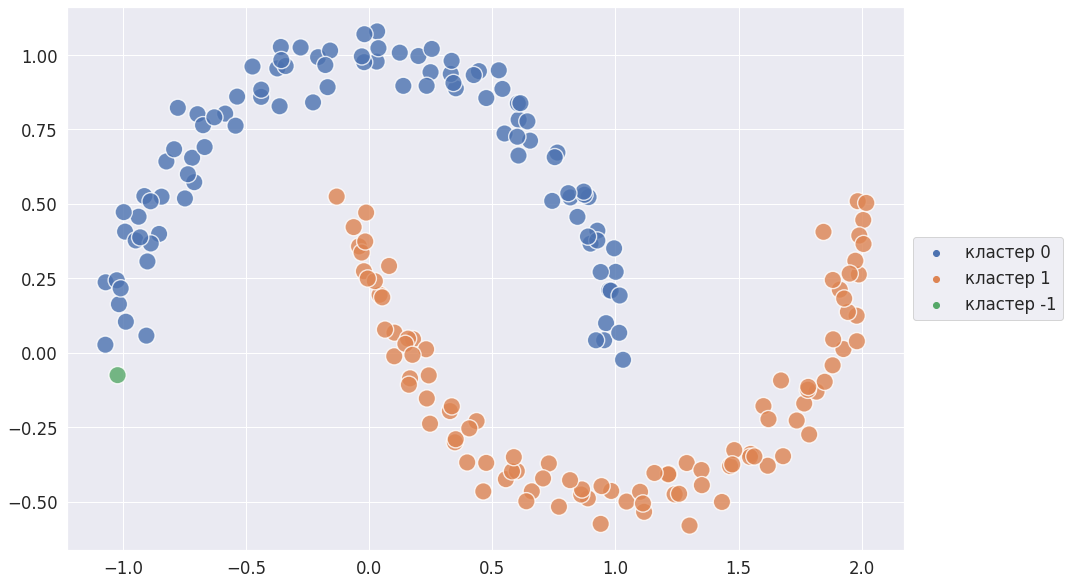

In [ ]:
y_db = ['кластер ' + str(i) for i in y_db]

sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(15, 10))
g = sns.scatterplot(x = X[:,0], y = X[:,1], hue = y_db, s = 300, alpha = 0.8)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1)